In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load Database

In [2]:
files = ['./data/nba_2019_20_players.csv',
 './data/nba_2020_21_players.csv',
 './data/nba_2021_22_players.csv']

F_PATH = './data'

In [3]:
def load_file(f):
    d = pd.read_csv(f)
    
    a = f.index('nba_')
    b = len('nba_')
    season = f[a + b: a + b + 7]
    
    d['Season'] = season
    
    return d

df = load_file(files[0])
for f in files[1:]:
    d = load_file(f)
    
    df = pd.concat([df, d], ignore_index=True)

In [4]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,Season
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01,2019_20
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2019_20
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01,2019_20
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01,2019_20
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2019_20


In [5]:
df['Pos'].describe()

count     2168
unique      15
top         SG
freq       507
Name: Pos, dtype: object

In [6]:
df['Pos'].astype('category').unique().tolist()

['C',
 'PF',
 'SG',
 'PG',
 'SF',
 'PF-SF',
 'PF-C',
 'SF-SG',
 'SF-C',
 'SF-PF',
 'SG-SF',
 'C-PF',
 'SG-PG',
 'PG-SG',
 'SG-PG-SF']

In [7]:
df.shape

(2168, 32)

In [8]:
# Save a copy of the processed data for later use
outputfile = os.path.join(F_PATH, 'players_2019_21_org.csv')
df.to_csv(outputfile, index=False)

## Data Clean-up

In [9]:
df['MP'].describe()

count    2168.000000
mean       18.920572
std         9.325327
min         1.000000
25%        11.500000
50%        18.400000
75%        26.600000
max        43.500000
Name: MP, dtype: float64

In [10]:
df[df['MP'] < 5].index

Int64Index([  13,   63,   65,   84,   86,  105,  135,  142,  143,  189,
            ...
            2051, 2053, 2068, 2069, 2114, 2154, 2156, 2157, 2158, 2159],
           dtype='int64', length=153)

In [11]:
# remove the players whose minutes per game is less than 5 minutes
# too short time to get enough information
df = df.drop(df[df['MP'] < 5].index)

In [12]:
df.shape

(2015, 32)

In [13]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional', 'Season'],
      dtype='object')

In [14]:
df['Rk'] = df.index

In [15]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,Season
0,0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01,2019_20
1,1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2019_20
2,2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01,2019_20
3,3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01,2019_20
4,4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2019_20


In [16]:
# Save a copy of the processed data for later use
outputfile = os.path.join(F_PATH, 'players_2019_21.csv')
df.to_csv(outputfile, index=False)

### Glossary

Also view explanations by holding mouse over column headers  
Rk -- Rank  
Pos -- Position  
Age -- Player's age on February 1 of the season  
Tm -- Team  
G -- Games  
GS -- Games Started  
MP -- Minutes Played Per Game  
FG -- Field Goals Per Game  
FGA -- Field Goal Attempts Per Game  
FG% -- Field Goal Percentage  
3P -- 3-Point Field Goals Per Game  
3PA -- 3-Point Field Goal Attempts Per Game  
3P% -- 3-Point Field Goal Percentage  
2P -- 2-Point Field Goals Per Game  
2PA -- 2-Point Field Goal Attempts Per Game  
2P% -- 2-Point Field Goal Percentage  
eFG% -- Effective Field Goal Percentage  
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.  
FT -- Free Throws Per Game  
FTA -- Free Throw Attempts Per Game  
FT% -- Free Throw Percentage  
ORB -- Offensive Rebounds Per Game  
DRB -- Defensive Rebounds Per Game  
TRB -- Total Rebounds Per Game  
AST -- Assists Per Game  
STL -- Steals Per Game  
BLK -- Blocks Per Game  
TOV -- Turnovers Per Game  
PF -- Personal Fouls Per Game  
PTS -- Points Per Game  

In [17]:
columns = ['Pos', 'Player', 'Rk', 'Season', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

In [18]:
# select data source
df_players = df[columns]

In [19]:
df_players.describe()

,Rk,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,1074.979156,3.239305,7.144467,0.985558,2.824665,2.256030,4.323275,1.365161,1.779355,0.858610,2.841241,3.698313,1.983375,0.640099,0.412556,1.109777,1.732457
std,625.768450,2.194442,4.571482,0.853386,2.193339,1.773361,3.238229,1.314161,1.615313,0.737244,1.770432,2.334965,1.795201,0.396622,0.394256,0.807191,0.747826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,530.500000,1.600000,3.700000,0.300000,1.100000,0.900000,1.900000,0.500000,0.700000,0.400000,1.600000,2.000000,0.800000,0.300000,0.200000,0.600000,1.200000
50%,1073.000000,2.700000,5.900000,0.800000,2.400000,1.800000,3.400000,1.000000,1.400000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.700000
75%,1613.500000,4.350000,9.500000,1.500000,4.100000,3.000000,5.800000,1.750000,2.300000,1.100000,3.700000,4.700000,2.500000,0.900000,0.500000,1.400000,2.200000
max,2167.000000,11.400000,23.000000,5.300000,12.700000,10.200000,18.700000,10.200000,11.800000,4.700000,11.400000,15.800000,11.700000,2.500000,3.400000,5.000000,5.000000


In [20]:
# union positions as 3 categories:
# Guard: SG, FG
# Forward: SF, PF
# Center: C

df_players['Pos'] = df['Pos'].str.slice(-1)

C:\Users\yuyw\AppData\Local\Temp\ipykernel_23144\1034856772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players['Pos'] = df['Pos'].str.slice(-1)


In [21]:
df_players['Pos'].describe()

count     2015
unique       3
top          G
freq       848
Name: Pos, dtype: object

In [22]:
# Save a copy of the processed data for later use
outputfile = os.path.join(F_PATH, 'players.csv')
df_players.to_csv(outputfile, index=False)

## Start handling dataset

In [23]:
df_org = pd.read_csv(outputfile)
df_org.head()

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,C,Steven Adams,0,2019_20,4.5,7.6,0.0,0.0,4.5,7.5,1.9,3.2,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9
1,F,Bam Adebayo,1,2019_20,6.1,11.0,0.0,0.2,6.1,10.8,3.7,5.3,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5
2,C,LaMarcus Aldridge,2,2019_20,7.4,15.0,1.2,3.0,6.2,12.0,3.0,3.6,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4
3,C,Kyle Alexander,3,2019_20,0.5,1.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5
4,G,Nickeil Alexander-Walker,4,2019_20,2.1,5.7,1.0,2.8,1.1,2.8,0.5,0.8,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2


In [24]:
df = df_org.drop(columns=['Player', 'Rk', 'Season'])

In [25]:
df.head()

,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,C,4.5,7.6,0.0,0.0,4.5,7.5,1.9,3.2,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9
1,F,6.1,11.0,0.0,0.2,6.1,10.8,3.7,5.3,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5
2,C,7.4,15.0,1.2,3.0,6.2,12.0,3.0,3.6,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4
3,C,0.5,1.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5
4,G,2.1,5.7,1.0,2.8,1.1,2.8,0.5,0.8,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

In [27]:
# Set up X and y variables
y, X = df['Pos'], df.drop(columns='Pos')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

In [28]:
# encoder the labels
enc = LabelEncoder()
enc = enc.fit(['C', 'F', 'G'])

In [29]:
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [30]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       157
           1       0.63      0.65      0.64       303
           2       0.84      0.78      0.81       346

    accuracy                           0.71       806
   macro avg       0.70      0.70      0.70       806
weighted avg       0.72      0.71      0.71       806

Accuracy score:  0.71
F1 Score:  0.71


Text(0.5, 102.72222222222219, 'Ground Truth')

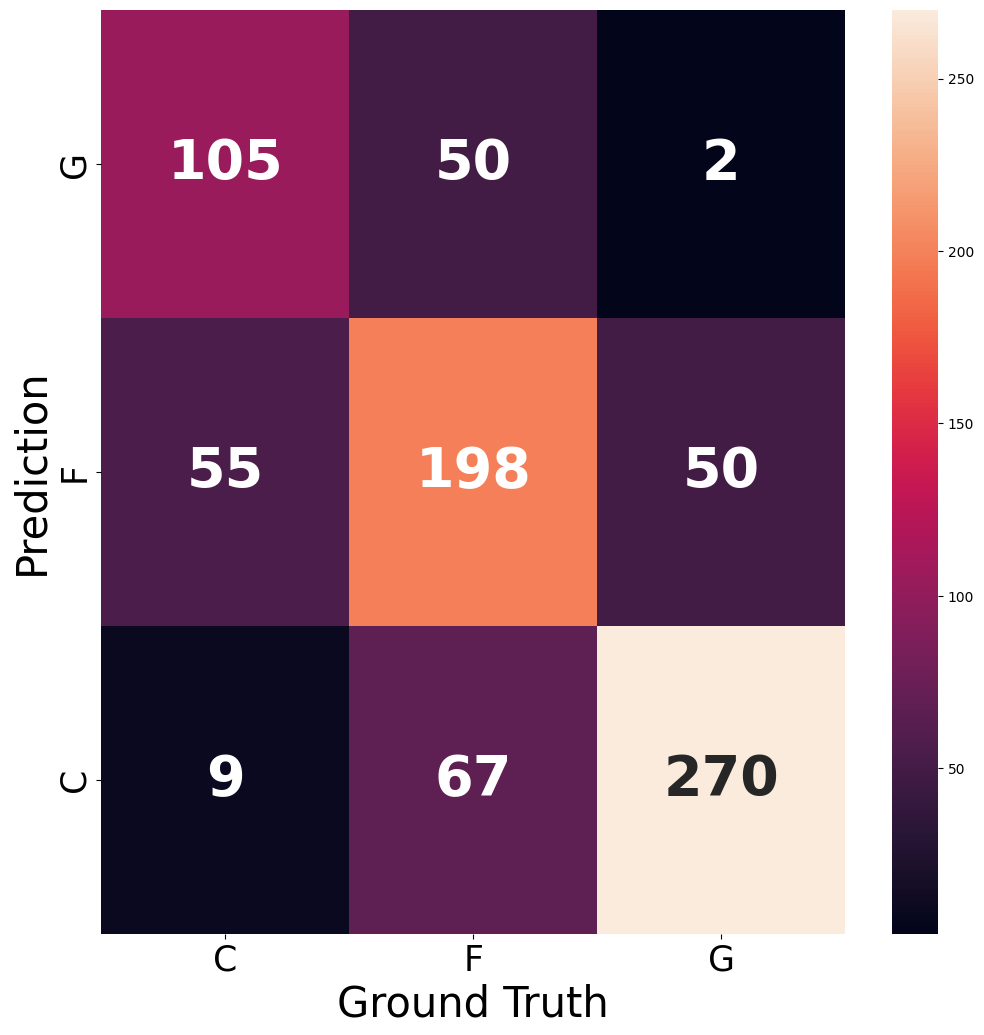

In [31]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['C', 'F', 'G']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [32]:
# Try K = 5 with weight
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       157
           1       0.62      0.71      0.66       303
           2       0.82      0.76      0.79       346

    accuracy                           0.72       806
   macro avg       0.73      0.71      0.72       806
weighted avg       0.73      0.72      0.73       806

Accuracy score:  0.72
F1 Score:  0.72


### To determine the best value of K

In [33]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test, average='micro')
    f1_scores.append((k, round(f1_score(y_test, y_pred, average='micro'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

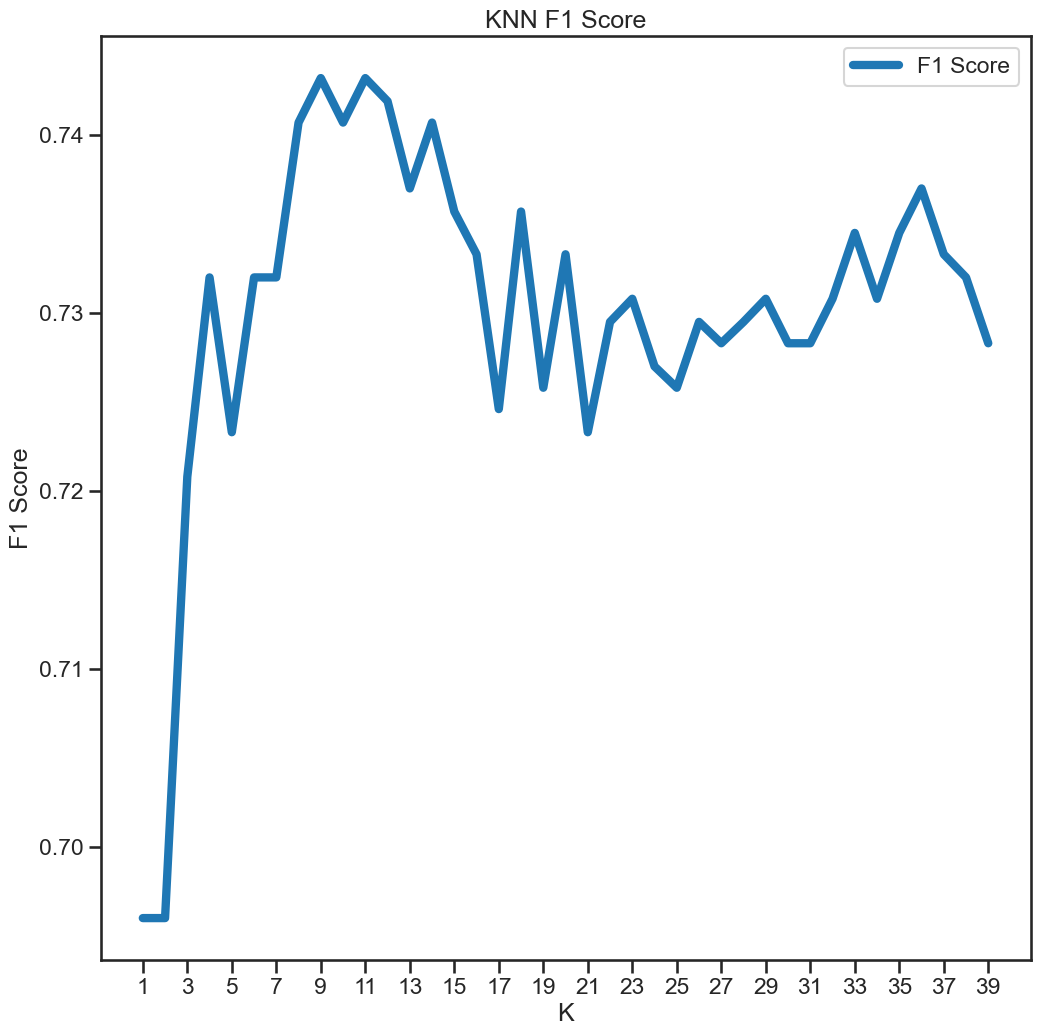

In [34]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig(os.path.join(F_PATH, 'knn_f1.png'))

<Figure size 1920x1440 with 0 Axes>

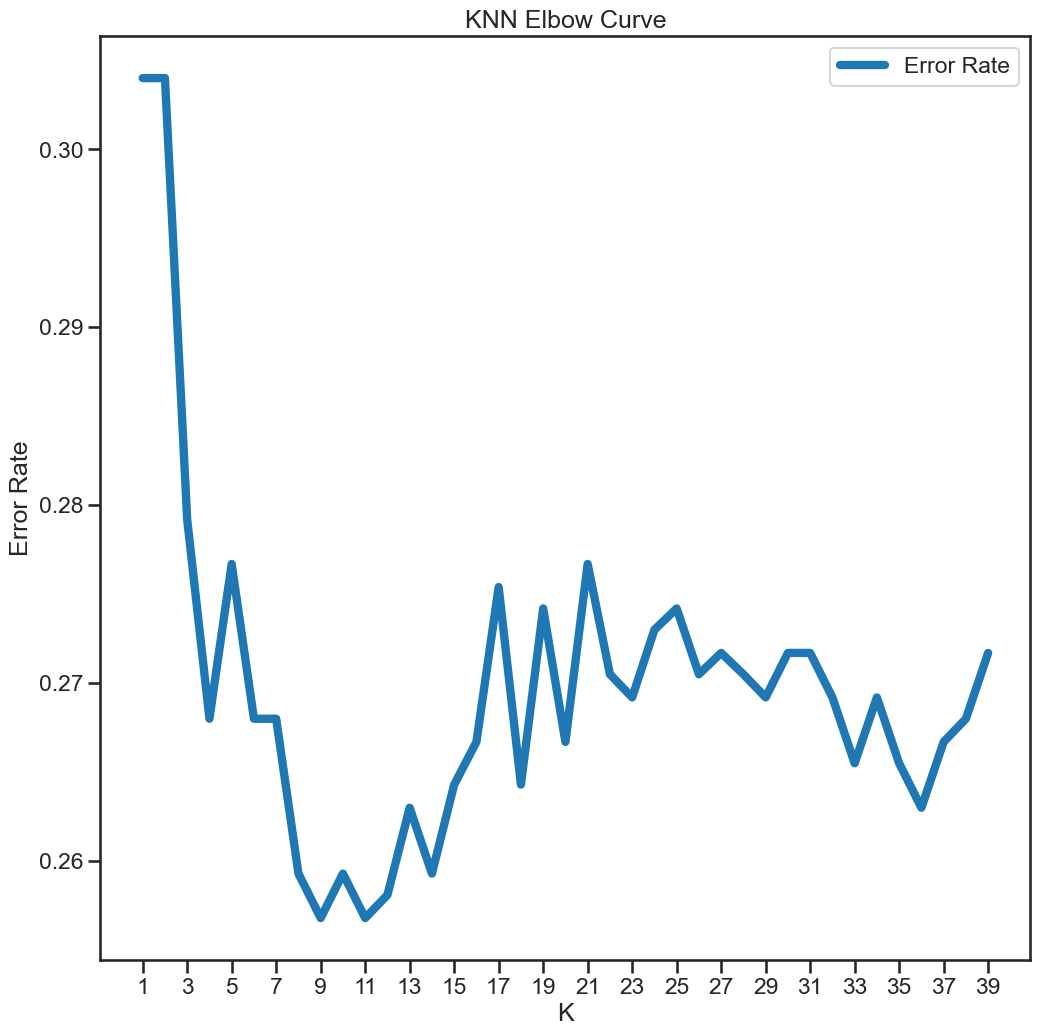

In [35]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig(os.path.join(F_PATH, 'knn_elbow.png'))

In [36]:
# Take K = 11 as the best value
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       157
           1       0.65      0.76      0.70       303
           2       0.85      0.77      0.81       346

    accuracy                           0.74       806
   macro avg       0.75      0.73      0.73       806
weighted avg       0.75      0.74      0.75       806

Accuracy score:  0.74
F1 Score:  0.74


Text(0.5, 89.0833333333333, 'Ground Truth')

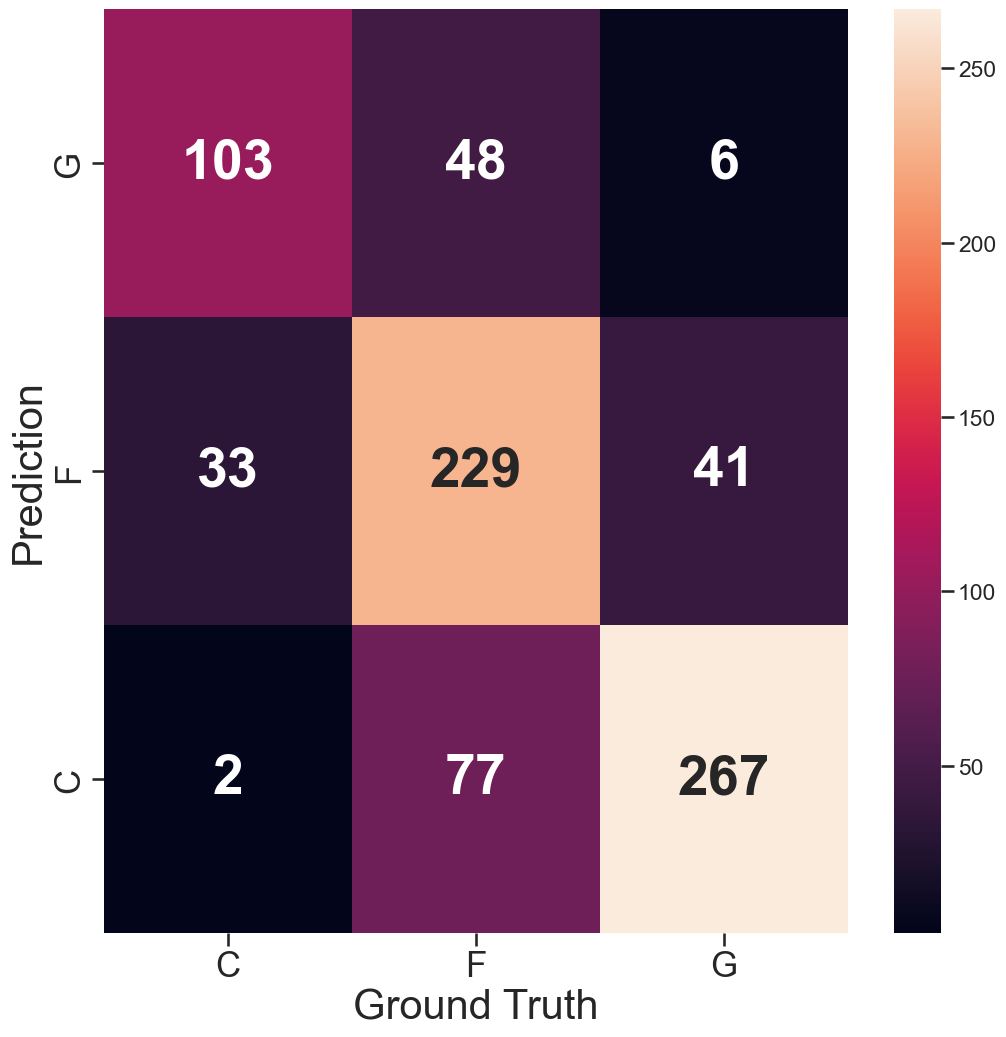

In [37]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['C', 'F', 'G']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [38]:
df_org.head()

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,C,Steven Adams,0,2019_20,4.5,7.6,0.0,0.0,4.5,7.5,1.9,3.2,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9
1,F,Bam Adebayo,1,2019_20,6.1,11.0,0.0,0.2,6.1,10.8,3.7,5.3,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5
2,C,LaMarcus Aldridge,2,2019_20,7.4,15.0,1.2,3.0,6.2,12.0,3.0,3.6,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4
3,C,Kyle Alexander,3,2019_20,0.5,1.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5
4,G,Nickeil Alexander-Walker,4,2019_20,2.1,5.7,1.0,2.8,1.1,2.8,0.5,0.8,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2


## Comparison on Different Position
The technical characteristics of the Center are obvious: few three-point shots, high rebounding.  
Guard own more Assists Per Game.

Text(0.5, 1.0, 'NBA Median Data Comparisons \non Different Position over seasons 2019-2012')

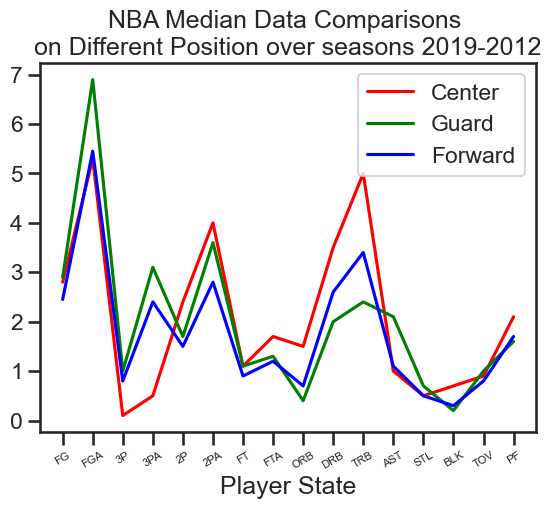

In [39]:
features = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
num = list(range(len(features)))

feature_c = df_org[df_org['Pos'] == 'C'][features].median()
feature_g = df_org[df_org['Pos'] == 'G'][features].median()
feature_f = df_org[df_org['Pos'] == 'F'][features].median()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(num, feature_c, c='red', label='Center');
ax.plot(num, feature_g, c='green', label='Guard');
ax.plot(num, feature_f, c='blue', label='Forward');

ax.legend()

ax.set_xticks(num, features, fontsize=8, rotation=30)

ax.set_xlabel("Player State")
ax.set_title("NBA Median Data Comparisons \non Different Position over seasons 2019-2012")

## Predictions

In [40]:
# Take some examples
df_c = df_org[df_org['Pos'] == 'C'].sample(3, random_state=12345)
df_g = df_org[df_org['Pos'] == 'G'].sample(3, random_state=54321)
df_f = df_org[df_org['Pos'] == 'F'].sample(3, random_state=11223)

print(df_c, df_g, df_f, sep='\n')

    Pos          Player   Rk   Season   FG   FGA   3P  3PA   2P  2PA   FT  \
194   C  Bruno Fernando  206  2019_20  1.8   3.6  0.1  0.7  1.8  2.9  0.5   
289   C     Serge Ibaka  304  2019_20  6.2  12.2  1.3  3.3  5.0  8.9  1.6   
766   C    Gorgui Dieng  817  2020_21  2.2   4.3  0.8  1.8  1.4  2.4  1.5   

     FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  
194  0.9  1.2  2.3  3.5  0.9  0.3  0.3  0.8  1.9  
289  2.3  2.1  6.1  8.2  1.4  0.5  0.8  2.0  2.8  
766  1.8  1.1  2.6  3.7  1.3  0.7  0.4  0.8  1.5  
     Pos           Player    Rk   Season   FG   FGA   3P  3PA   2P  2PA   FT  \
1712   G  Wesley Matthews  1839  2021_22  1.8   4.5  1.1  3.2  0.7  1.3  0.4   
1147   G     Derrick Rose  1222  2020_21  5.3  12.3  0.9  2.6  4.4  9.7  2.8   
940    G      Mason Jones  1001  2020_21  1.6   3.8  0.8  2.1  0.9  1.8  1.3   

      FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  
1712  0.6  0.6  1.3  1.9  0.7  0.5  0.2  0.4  1.8  
1147  3.3  0.4  1.5  1.9  4.2  1.2  0.3  1.9  1.1  
940   2.0 

In [41]:
df_c['Player'].unique().tolist()

['Bruno Fernando', 'Serge Ibaka', 'Gorgui Dieng']

In [42]:
df_g['Player'].unique().tolist()

['Wesley Matthews', 'Derrick Rose', 'Mason Jones']

In [43]:
df_f['Player'].unique().tolist()

['Lauri Markkanen', 'Taurean Prince', 'Jaren Jackson Jr.']

In [44]:
df_c.iloc[0][features]

FG     1.8
FGA    3.6
3P     0.1
3PA    0.7
2P     1.8
2PA    2.9
FT     0.5
FTA    0.9
ORB    1.2
DRB    2.3
TRB    3.5
AST    0.9
STL    0.3
BLK    0.3
TOV    0.8
PF     1.9
Name: 194, dtype: object

In [45]:
labels = enc.classes_.tolist()

In [46]:
# Get all data for the players whose position is Center in the examples over the years 2019-2012
df_c_more = df_org[df_org['Player'].isin([s for s in df_c['Player']])]

In [47]:
x_test = df_c_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = knn.predict(x_test)

pred = [labels[i] for i in y_pred]

In [48]:
result = df_c_more.copy().reset_index().drop('index', axis=1)

In [49]:
result.insert(0, 'Prediction', pred)

In [50]:
result

,Prediction,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,C,C,Gorgui Dieng,172,2019_20,2.6,5.8,0.9,2.4,1.8,...,1.2,1.6,1.4,4.2,5.6,1.2,0.8,0.9,1.0,2.0
1,C,C,Gorgui Dieng,173,2019_20,2.7,6.0,1.0,2.6,1.7,...,1.0,1.3,1.6,4.0,5.6,1.3,0.8,0.9,1.0,1.9
2,C,C,Gorgui Dieng,174,2019_20,2.5,5.1,0.5,1.9,2.0,...,1.8,2.5,1.1,4.7,5.8,0.9,0.8,1.0,0.9,2.1
3,C,C,Bruno Fernando,206,2019_20,1.8,3.6,0.1,0.7,1.8,...,0.5,0.9,1.2,2.3,3.5,0.9,0.3,0.3,0.8,1.9
4,C,C,Serge Ibaka,304,2019_20,6.2,12.2,1.3,3.3,5.0,...,1.6,2.3,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8
5,C,C,Gorgui Dieng,817,2020_21,2.2,4.3,0.8,1.8,1.4,...,1.5,1.8,1.1,2.6,3.7,1.3,0.7,0.4,0.8,1.5
6,C,C,Gorgui Dieng,818,2020_21,2.5,4.9,1.0,2.2,1.5,...,1.7,2.0,1.3,3.2,4.5,1.3,0.8,0.6,1.0,1.7
7,C,C,Gorgui Dieng,819,2020_21,1.8,3.4,0.4,1.4,1.4,...,1.3,1.5,0.8,1.9,2.6,1.2,0.6,0.1,0.6,1.1
8,C,C,Bruno Fernando,848,2020_21,0.5,1.3,0.0,0.1,0.5,...,0.5,0.7,0.5,1.9,2.4,0.3,0.1,0.1,0.6,0.7
9,C,C,Serge Ibaka,963,2020_21,4.5,8.9,1.0,2.8,3.6,...,1.0,1.3,1.8,4.9,6.7,1.8,0.2,1.1,1.1,1.9


In [51]:
# Get all data for the players whose position is Forward in the examples over the years 2019-2012
df_f_more = df_org[df_org['Player'].isin([s for s in df_f['Player']])]

In [52]:
x_test = df_f_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = knn.predict(x_test)

pred = [labels[i] for i in y_pred]

In [53]:
result = df_f_more.copy().reset_index().drop('index', axis=1)

In [54]:
result.insert(0, 'Prediction', pred)
result

,Prediction,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,F,C,Jaren Jackson Jr.,313,2019_20,6.2,13.2,2.5,6.5,3.6,...,2.4,3.3,1.0,3.6,4.6,1.4,0.7,1.6,1.7,4.1
1,F,F,Lauri Markkanen,392,2019_20,5.0,11.8,2.2,6.3,2.8,...,2.5,3.1,1.2,5.1,6.3,1.5,0.8,0.5,1.6,1.9
2,F,F,Taurean Prince,506,2019_20,4.3,11.5,2.3,6.7,2.1,...,1.1,1.4,0.8,5.2,6.0,1.8,0.9,0.4,2.0,2.5
3,C,C,Jaren Jackson Jr.,973,2020_21,4.8,11.4,1.5,5.5,3.3,...,3.2,3.8,1.5,4.1,5.6,1.1,1.1,1.6,1.4,3.8
4,F,F,Lauri Markkanen,1064,2020_21,4.9,10.2,2.3,5.8,2.6,...,1.5,1.8,0.7,4.6,5.3,0.9,0.5,0.3,1.0,1.5
5,F,F,Taurean Prince,1188,2020_21,3.2,8.0,1.5,3.8,1.7,...,1.6,1.9,0.5,3.0,3.5,1.9,0.7,0.6,1.1,1.8
6,F,F,Taurean Prince,1189,2020_21,2.5,6.2,1.1,3.1,1.4,...,2.0,2.3,0.2,2.7,2.8,0.6,0.7,0.7,0.9,1.8
7,F,F,Taurean Prince,1190,2020_21,3.5,8.7,1.7,4.1,1.8,...,1.4,1.7,0.6,3.1,3.7,2.4,0.7,0.5,1.2,1.9
8,F,F,Jaren Jackson Jr.,1716,2021_22,5.5,13.3,1.6,5.1,3.9,...,3.6,4.4,1.5,4.3,5.8,1.1,0.9,2.3,1.7,3.5
9,F,F,Lauri Markkanen,1829,2021_22,5.1,11.5,2.2,6.2,2.9,...,2.3,2.6,1.0,4.7,5.7,1.3,0.7,0.5,0.9,2.1


### Very interesting! Jaren Jackson Jr. play on season 2019-2020 and 2020-2021 as Center, but on season 2021-2022 as Forward! That 's why model for Forward predicts the data on line 4 (index = 912) as Center.

In [55]:
# Get all data for the players whose position is Guard in the examples over the years 2019-2012
df_g_more = df_org[df_org['Player'].isin([s for s in df_g['Player']])]

In [56]:
x_test = df_g_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = knn.predict(x_test)

# print(f"Error number = {y_pred[y_pred != labels.index('G')].sum()}")
pred = [labels[i] for i in y_pred]

In [57]:
result = df_g_more.copy().reset_index().drop('index', axis=1)

In [58]:
result.insert(0, 'Prediction', pred)
result

,Prediction,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,G,G,Wesley Matthews,399,2019_20,2.5,6.3,1.6,4.4,0.9,...,0.8,1.0,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5
1,G,G,Derrick Rose,527,2019_20,7.4,15.1,0.9,2.9,6.5,...,2.4,2.8,0.5,1.9,2.4,5.6,0.8,0.3,2.5,1.0
2,G,G,Mason Jones,1001,2020_21,1.6,3.8,0.8,2.1,0.9,...,1.3,2.0,0.2,1.5,1.7,1.3,0.2,0.0,0.9,0.8
3,F,G,Mason Jones,1002,2020_21,1.8,4.4,0.9,2.5,0.9,...,1.3,2.2,0.2,1.8,2.0,1.5,0.2,0.0,1.1,0.8
4,F,G,Wesley Matthews,1074,2020_21,1.5,4.3,1.1,3.4,0.4,...,0.6,0.7,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4
5,G,G,Derrick Rose,1221,2020_21,5.7,12.2,1.0,2.6,4.7,...,2.2,2.5,0.4,2.2,2.6,4.2,1.0,0.4,1.6,1.1
6,G,G,Derrick Rose,1222,2020_21,5.3,12.3,0.9,2.6,4.4,...,2.8,3.3,0.4,1.5,1.9,4.2,1.2,0.3,1.9,1.1
7,G,G,Derrick Rose,1223,2020_21,5.9,12.2,1.1,2.6,4.9,...,1.9,2.2,0.4,2.5,2.9,4.2,0.9,0.4,1.4,1.1
8,G,G,Mason Jones,1756,2021_22,1.8,3.8,0.3,1.0,1.5,...,3.0,3.8,0.3,2.3,2.5,1.0,0.5,0.0,0.3,2.0
9,F,G,Wesley Matthews,1839,2021_22,1.8,4.5,1.1,3.2,0.7,...,0.4,0.6,0.6,1.3,1.9,0.7,0.5,0.2,0.4,1.8


# SVM

In [59]:
from sklearn.svm import SVC

In [60]:
rbfsvc = SVC(kernel='rbf', gamma='auto', C=10.0)
rbfsvc = rbfsvc.fit(X_train, y_train)
y_pred = rbfsvc.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       157
           1       0.65      0.70      0.67       303
           2       0.84      0.81      0.82       346

    accuracy                           0.74       806
   macro avg       0.74      0.72      0.73       806
weighted avg       0.74      0.74      0.74       806

Accuracy score:  0.74
F1 Score:  0.74


Text(0.5, 89.0833333333333, 'Ground Truth')

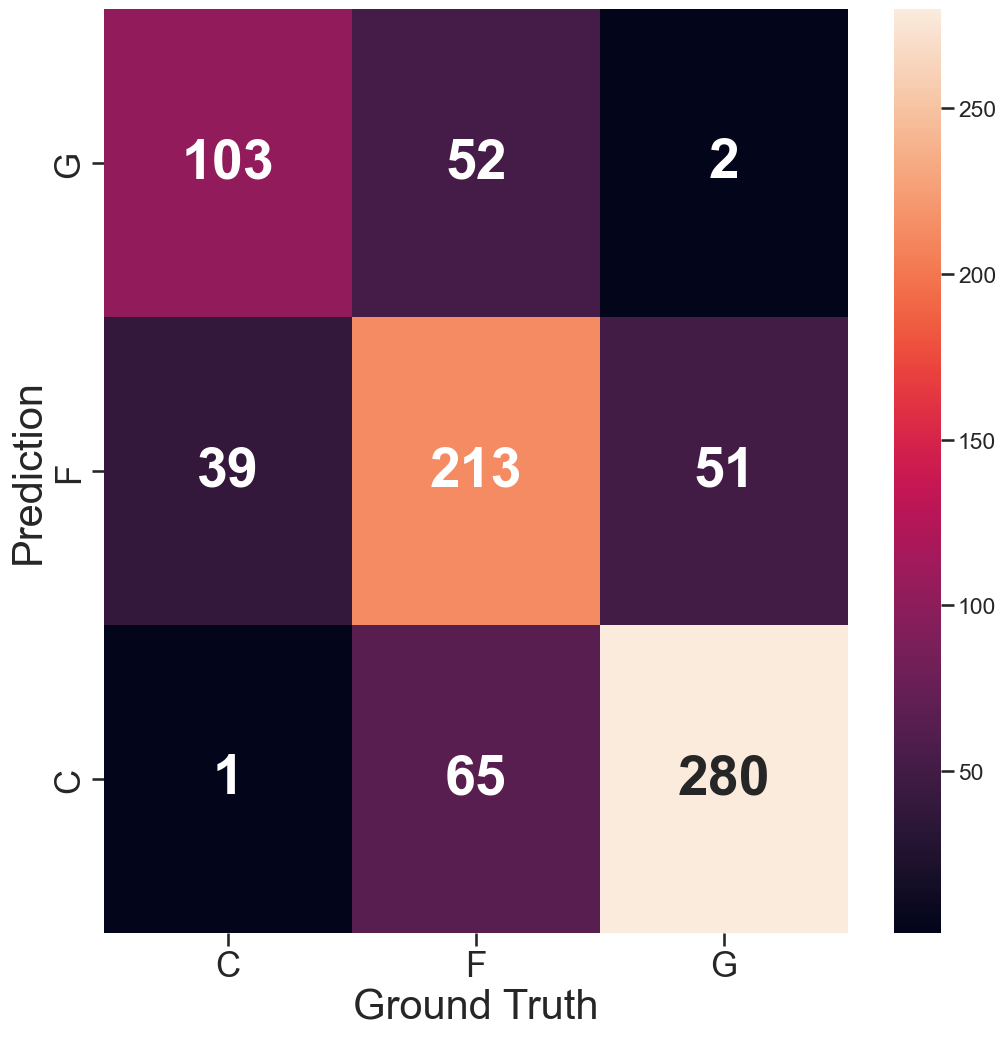

In [61]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['C', 'F', 'G']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [62]:
x_test = df_c_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rbfsvc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('C')].sum()}")
[labels[i] for i in y_pred]

Error number = 4


['C',
 'F',
 'C',
 'C',
 'C',
 'C',
 'C',
 'F',
 'F',
 'C',
 'F',
 'C',
 'C',
 'C',
 'C',
 'C']

In [63]:
df_c_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
163,C,Gorgui Dieng,172,2019_20,2.6,5.8,0.9,2.4,1.8,3.4,1.2,1.6,1.4,4.2,5.6,1.2,0.8,0.9,1.0,2.0
164,C,Gorgui Dieng,173,2019_20,2.7,6.0,1.0,2.6,1.7,3.4,1.0,1.3,1.6,4.0,5.6,1.3,0.8,0.9,1.0,1.9
165,C,Gorgui Dieng,174,2019_20,2.5,5.1,0.5,1.9,2.0,3.2,1.8,2.5,1.1,4.7,5.8,0.9,0.8,1.0,0.9,2.1
194,C,Bruno Fernando,206,2019_20,1.8,3.6,0.1,0.7,1.8,2.9,0.5,0.9,1.2,2.3,3.5,0.9,0.3,0.3,0.8,1.9
289,C,Serge Ibaka,304,2019_20,6.2,12.2,1.3,3.3,5.0,8.9,1.6,2.3,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8
766,C,Gorgui Dieng,817,2020_21,2.2,4.3,0.8,1.8,1.4,2.4,1.5,1.8,1.1,2.6,3.7,1.3,0.7,0.4,0.8,1.5
767,C,Gorgui Dieng,818,2020_21,2.5,4.9,1.0,2.2,1.5,2.7,1.7,2.0,1.3,3.2,4.5,1.3,0.8,0.6,1.0,1.7
768,C,Gorgui Dieng,819,2020_21,1.8,3.4,0.4,1.4,1.4,2.1,1.3,1.5,0.8,1.9,2.6,1.2,0.6,0.1,0.6,1.1
794,C,Bruno Fernando,848,2020_21,0.5,1.3,0.0,0.1,0.5,1.3,0.5,0.7,0.5,1.9,2.4,0.3,0.1,0.1,0.6,0.7
902,C,Serge Ibaka,963,2020_21,4.5,8.9,1.0,2.8,3.6,6.1,1.0,1.3,1.8,4.9,6.7,1.8,0.2,1.1,1.1,1.9


In [64]:
x_test = df_f_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rbfsvc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('F')].sum()}")
[labels[i] for i in y_pred]

Error number = 6


['G', 'F', 'F', 'C', 'F', 'G', 'F', 'G', 'F', 'F', 'F']

In [65]:
df_f_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
298,C,Jaren Jackson Jr.,313,2019_20,6.2,13.2,2.5,6.5,3.6,6.8,2.4,3.3,1.0,3.6,4.6,1.4,0.7,1.6,1.7,4.1
372,F,Lauri Markkanen,392,2019_20,5.0,11.8,2.2,6.3,2.8,5.5,2.5,3.1,1.2,5.1,6.3,1.5,0.8,0.5,1.6,1.9
480,F,Taurean Prince,506,2019_20,4.3,11.5,2.3,6.7,2.1,4.8,1.1,1.4,0.8,5.2,6.0,1.8,0.9,0.4,2.0,2.5
912,C,Jaren Jackson Jr.,973,2020_21,4.8,11.4,1.5,5.5,3.3,5.9,3.2,3.8,1.5,4.1,5.6,1.1,1.1,1.6,1.4,3.8
998,F,Lauri Markkanen,1064,2020_21,4.9,10.2,2.3,5.8,2.6,4.4,1.5,1.8,0.7,4.6,5.3,0.9,0.5,0.3,1.0,1.5
1116,F,Taurean Prince,1188,2020_21,3.2,8.0,1.5,3.8,1.7,4.2,1.6,1.9,0.5,3.0,3.5,1.9,0.7,0.6,1.1,1.8
1117,F,Taurean Prince,1189,2020_21,2.5,6.2,1.1,3.1,1.4,3.1,2.0,2.3,0.2,2.7,2.8,0.6,0.7,0.7,0.9,1.8
1118,F,Taurean Prince,1190,2020_21,3.5,8.7,1.7,4.1,1.8,4.7,1.4,1.7,0.6,3.1,3.7,2.4,0.7,0.5,1.2,1.9
1606,F,Jaren Jackson Jr.,1716,2021_22,5.5,13.3,1.6,5.1,3.9,8.1,3.6,4.4,1.5,4.3,5.8,1.1,0.9,2.3,1.7,3.5
1704,F,Lauri Markkanen,1829,2021_22,5.1,11.5,2.2,6.2,2.9,5.3,2.3,2.6,1.0,4.7,5.7,1.3,0.7,0.5,0.9,2.1


In [66]:
x_test = df_g_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rbfsvc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('G')].sum()}")
[labels[i] for i in y_pred]

Error number = 1


['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'F', 'G']

In [67]:
df_g_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
379,G,Wesley Matthews,399,2019_20,2.5,6.3,1.6,4.4,0.9,1.9,0.8,1.0,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5
500,G,Derrick Rose,527,2019_20,7.4,15.1,0.9,2.9,6.5,12.1,2.4,2.8,0.5,1.9,2.4,5.6,0.8,0.3,2.5,1.0
940,G,Mason Jones,1001,2020_21,1.6,3.8,0.8,2.1,0.9,1.8,1.3,2.0,0.2,1.5,1.7,1.3,0.2,0.0,0.9,0.8
941,G,Mason Jones,1002,2020_21,1.8,4.4,0.9,2.5,0.9,1.9,1.3,2.2,0.2,1.8,2.0,1.5,0.2,0.0,1.1,0.8
1008,G,Wesley Matthews,1074,2020_21,1.5,4.3,1.1,3.4,0.4,0.9,0.6,0.7,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4
1146,G,Derrick Rose,1221,2020_21,5.7,12.2,1.0,2.6,4.7,9.6,2.2,2.5,0.4,2.2,2.6,4.2,1.0,0.4,1.6,1.1
1147,G,Derrick Rose,1222,2020_21,5.3,12.3,0.9,2.6,4.4,9.7,2.8,3.3,0.4,1.5,1.9,4.2,1.2,0.3,1.9,1.1
1148,G,Derrick Rose,1223,2020_21,5.9,12.2,1.1,2.6,4.9,9.6,1.9,2.2,0.4,2.5,2.9,4.2,0.9,0.4,1.4,1.1
1638,G,Mason Jones,1756,2021_22,1.8,3.8,0.3,1.0,1.5,2.8,3.0,3.8,0.3,2.3,2.5,1.0,0.5,0.0,0.3,2.0
1712,G,Wesley Matthews,1839,2021_22,1.8,4.5,1.1,3.2,0.7,1.3,0.4,0.6,0.6,1.3,1.9,0.7,0.5,0.2,0.4,1.8


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rc = RandomForestClassifier(n_estimators=200)
rc = rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74       157
           1       0.69      0.73      0.71       303
           2       0.84      0.84      0.84       346

    accuracy                           0.77       806
   macro avg       0.77      0.76      0.76       806
weighted avg       0.77      0.77      0.77       806

Accuracy score:  0.77
F1 Score:  0.77


Text(0.5, 89.0833333333333, 'Ground Truth')

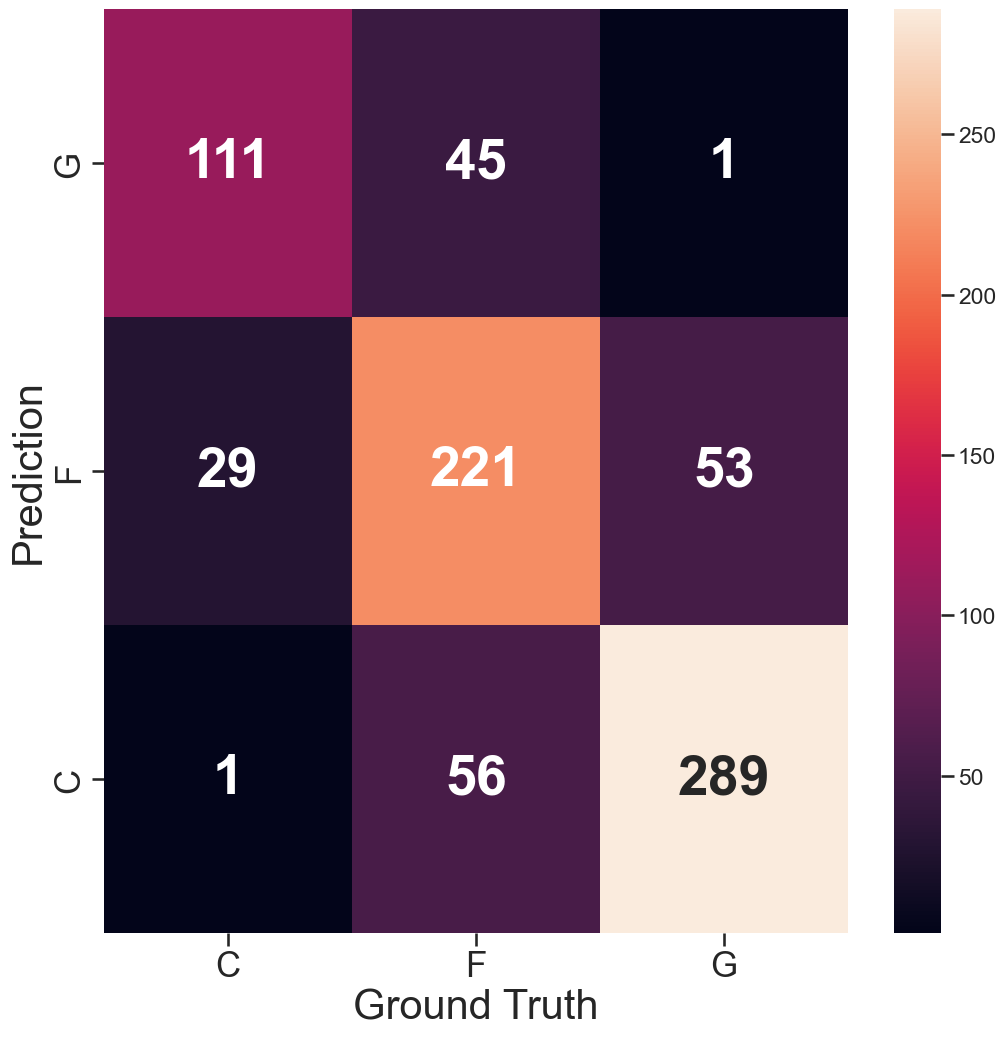

In [70]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['C', 'F', 'G']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [71]:
x_test = df_c_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('C')].sum()}")
[labels[i] for i in y_pred]

Error number = 2


['C',
 'F',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'F',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [72]:
df_c_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
163,C,Gorgui Dieng,172,2019_20,2.6,5.8,0.9,2.4,1.8,3.4,1.2,1.6,1.4,4.2,5.6,1.2,0.8,0.9,1.0,2.0
164,C,Gorgui Dieng,173,2019_20,2.7,6.0,1.0,2.6,1.7,3.4,1.0,1.3,1.6,4.0,5.6,1.3,0.8,0.9,1.0,1.9
165,C,Gorgui Dieng,174,2019_20,2.5,5.1,0.5,1.9,2.0,3.2,1.8,2.5,1.1,4.7,5.8,0.9,0.8,1.0,0.9,2.1
194,C,Bruno Fernando,206,2019_20,1.8,3.6,0.1,0.7,1.8,2.9,0.5,0.9,1.2,2.3,3.5,0.9,0.3,0.3,0.8,1.9
289,C,Serge Ibaka,304,2019_20,6.2,12.2,1.3,3.3,5.0,8.9,1.6,2.3,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8
766,C,Gorgui Dieng,817,2020_21,2.2,4.3,0.8,1.8,1.4,2.4,1.5,1.8,1.1,2.6,3.7,1.3,0.7,0.4,0.8,1.5
767,C,Gorgui Dieng,818,2020_21,2.5,4.9,1.0,2.2,1.5,2.7,1.7,2.0,1.3,3.2,4.5,1.3,0.8,0.6,1.0,1.7
768,C,Gorgui Dieng,819,2020_21,1.8,3.4,0.4,1.4,1.4,2.1,1.3,1.5,0.8,1.9,2.6,1.2,0.6,0.1,0.6,1.1
794,C,Bruno Fernando,848,2020_21,0.5,1.3,0.0,0.1,0.5,1.3,0.5,0.7,0.5,1.9,2.4,0.3,0.1,0.1,0.6,0.7
902,C,Serge Ibaka,963,2020_21,4.5,8.9,1.0,2.8,3.6,6.1,1.0,1.3,1.8,4.9,6.7,1.8,0.2,1.1,1.1,1.9


In [73]:
x_test = df_f_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('F')].sum()}")
[labels[i] for i in y_pred]

Error number = 2


['F', 'F', 'F', 'C', 'F', 'F', 'F', 'G', 'F', 'F', 'F']

In [74]:
df_f_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
298,C,Jaren Jackson Jr.,313,2019_20,6.2,13.2,2.5,6.5,3.6,6.8,2.4,3.3,1.0,3.6,4.6,1.4,0.7,1.6,1.7,4.1
372,F,Lauri Markkanen,392,2019_20,5.0,11.8,2.2,6.3,2.8,5.5,2.5,3.1,1.2,5.1,6.3,1.5,0.8,0.5,1.6,1.9
480,F,Taurean Prince,506,2019_20,4.3,11.5,2.3,6.7,2.1,4.8,1.1,1.4,0.8,5.2,6.0,1.8,0.9,0.4,2.0,2.5
912,C,Jaren Jackson Jr.,973,2020_21,4.8,11.4,1.5,5.5,3.3,5.9,3.2,3.8,1.5,4.1,5.6,1.1,1.1,1.6,1.4,3.8
998,F,Lauri Markkanen,1064,2020_21,4.9,10.2,2.3,5.8,2.6,4.4,1.5,1.8,0.7,4.6,5.3,0.9,0.5,0.3,1.0,1.5
1116,F,Taurean Prince,1188,2020_21,3.2,8.0,1.5,3.8,1.7,4.2,1.6,1.9,0.5,3.0,3.5,1.9,0.7,0.6,1.1,1.8
1117,F,Taurean Prince,1189,2020_21,2.5,6.2,1.1,3.1,1.4,3.1,2.0,2.3,0.2,2.7,2.8,0.6,0.7,0.7,0.9,1.8
1118,F,Taurean Prince,1190,2020_21,3.5,8.7,1.7,4.1,1.8,4.7,1.4,1.7,0.6,3.1,3.7,2.4,0.7,0.5,1.2,1.9
1606,F,Jaren Jackson Jr.,1716,2021_22,5.5,13.3,1.6,5.1,3.9,8.1,3.6,4.4,1.5,4.3,5.8,1.1,0.9,2.3,1.7,3.5
1704,F,Lauri Markkanen,1829,2021_22,5.1,11.5,2.2,6.2,2.9,5.3,2.3,2.6,1.0,4.7,5.7,1.3,0.7,0.5,0.9,2.1


In [75]:
x_test = df_g_more.drop(columns=['Pos', 'Player', 'Rk', 'Season'])
y_pred = rc.predict(x_test)

print(f"Error number = {y_pred[y_pred != labels.index('G')].sum()}")
[labels[i] for i in y_pred]

Error number = 1


['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'F', 'G']

In [76]:
df_g_more

,Pos,Player,Rk,Season,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
379,G,Wesley Matthews,399,2019_20,2.5,6.3,1.6,4.4,0.9,1.9,0.8,1.0,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5
500,G,Derrick Rose,527,2019_20,7.4,15.1,0.9,2.9,6.5,12.1,2.4,2.8,0.5,1.9,2.4,5.6,0.8,0.3,2.5,1.0
940,G,Mason Jones,1001,2020_21,1.6,3.8,0.8,2.1,0.9,1.8,1.3,2.0,0.2,1.5,1.7,1.3,0.2,0.0,0.9,0.8
941,G,Mason Jones,1002,2020_21,1.8,4.4,0.9,2.5,0.9,1.9,1.3,2.2,0.2,1.8,2.0,1.5,0.2,0.0,1.1,0.8
1008,G,Wesley Matthews,1074,2020_21,1.5,4.3,1.1,3.4,0.4,0.9,0.6,0.7,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4
1146,G,Derrick Rose,1221,2020_21,5.7,12.2,1.0,2.6,4.7,9.6,2.2,2.5,0.4,2.2,2.6,4.2,1.0,0.4,1.6,1.1
1147,G,Derrick Rose,1222,2020_21,5.3,12.3,0.9,2.6,4.4,9.7,2.8,3.3,0.4,1.5,1.9,4.2,1.2,0.3,1.9,1.1
1148,G,Derrick Rose,1223,2020_21,5.9,12.2,1.1,2.6,4.9,9.6,1.9,2.2,0.4,2.5,2.9,4.2,0.9,0.4,1.4,1.1
1638,G,Mason Jones,1756,2021_22,1.8,3.8,0.3,1.0,1.5,2.8,3.0,3.8,0.3,2.3,2.5,1.0,0.5,0.0,0.3,2.0
1712,G,Wesley Matthews,1839,2021_22,1.8,4.5,1.1,3.2,0.7,1.3,0.4,0.6,0.6,1.3,1.9,0.7,0.5,0.2,0.4,1.8
